In [1]:
#Functions
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

def DTFT(y,M,a,N,W):
    Y = [0 for i in range(N)]
    for i in range(N):
        for k in range(M):
            Y[i] += y[k]*np.exp((-1j)*W[i]*(a+k))
    return Y

def sum_n(X,H,n): #convolution sum for a particular n
    su=0
    for k in range(len(X)):
        if (n-k)>=0 and (n-k)<len(H):
            su=su+X[k]*H[n-k]
    return su

#convolution for the given sequences    
def convolution(X,H):
    Y=[]
    for i in range(len(H)+len(X)-1):
        Y.append(sum_n(X,H,i))
    return Y

def convolution_x(X,H,a_x,a_h):
    x = [i for i in range(a_x+a_h,a_x+a_h+len(X)+len(H)-1)]
    return x

def  convolution_wav(X,H,framerate,nchannels,sampwidth,choice,str_1):
	Y=[]
	for i in range(len(H)+len(X)-1):
		Y.append(sum_n(X,H,i))
    
	for i in range(len(Y)):
		if Y[i]<0:
			Y[i] = 0
		elif Y[i]>255:
			Y[i] = 255
		else:
			Y[i] = round(Y[i])

	Y_arr=np.asarray(Y)	 #list to array
	Y_1=(Y_arr).astype('b') #converting into bytes
	y_n=wave.open(str_1[:-4]+"_conv_with_"+str(choice)+"_seq"+".wav","w")#file of the form: wow_conv_with_1_seq.wav
	y_n.setnchannels(nchannels) #writing the data to a .wav file
	y_n.setsampwidth(sampwidth)
	y_n.setframerate(framerate)
	y_n.writeframes(Y_1.tobytes())
	y_n.close()
	return Y

#For calculating group delay
def grd(H_ph):
    H_grd = [0 for i in range(N)]
    for i in range(1,N-1,1):
        H_grd[i] = (H_ph[i+1]-H_ph[i-1])/(4*np.pi/N)
    
    H_grd[0] = (H_ph[1]-H_ph[0])/(2*np.pi/N)
    H_grd[N-1] = (H_ph[N-1]-H_ph[N-2])/(2*np.pi/N)
    return H_grd

N = 1000
W = np.linspace((-1)*np.pi, np.pi, num=N, endpoint=False)

# Question 1

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


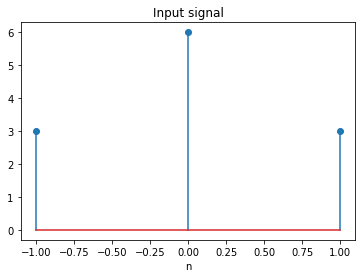

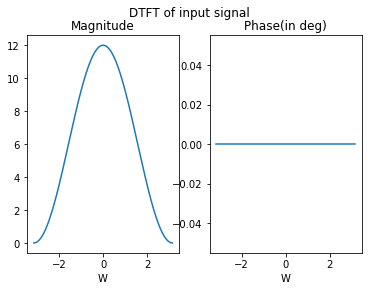

From the graph, we can see that it is a low pass and zero phase system


In [34]:
x = [3,6,3]
n_xaxis = [-1,0,1]
plt.xlabel("n") 
plt.stem(n_xaxis, x)
plt.gca().set_title('Input signal')
plt.show()

#Calculating DTFT
X = DTFT(x,len(x),-1,N,W)
X_mag = [0 for i in range(N)]
for i in range(N):
    X_mag[i] = np.abs(X[i])
X_ph = [0 for i in range(N)]
for i in range(N):
    X_ph[i] = np.round(np.angle(X[i], deg=True),decimals=4)

plt.subplot(1,2,1)
plt.plot(W,X_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,X_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.suptitle("DTFT of input signal")
plt.show()

print("From the graph, we can see that it is a low pass and zero phase system")

# Question 2(a)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


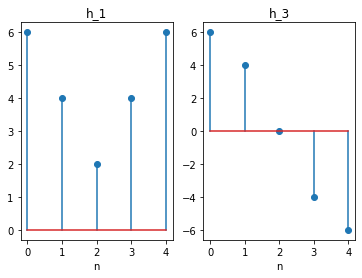

In [28]:
h_1 = [6,4,2,4,6]
m = [1,1,0,-1,-1]
h_3 = []

for num1, num2 in zip(h_1, m):
    h_3.append(num1 * num2)

n_xaxis = [i for i in range(5)]
plt.subplot(1,2,1)
plt.xlabel("n") 
plt.stem(n_xaxis, h_1)
plt.gca().set_title('h_1')
plt.subplot(1,2,2)
plt.xlabel("n") 
plt.stem(n_xaxis, h_3)
plt.gca().set_title('h_3')
plt.show()

# Question 2(b)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


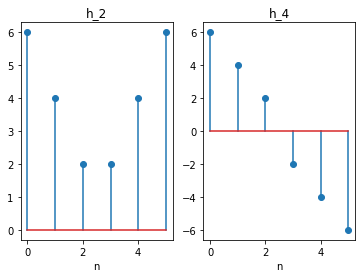

In [29]:
h_2 = [6,4,2,2,4,6]
m = [1,1,1,-1,-1,-1]
h_4 = []

for num1, num2 in zip(h_2, m):
    h_4.append(num1 * num2)

n_xaxis = [i for i in range(6)]
plt.subplot(1,2,1)
plt.xlabel("n") 
plt.stem(n_xaxis, h_2)
plt.gca().set_title('h_2')
plt.subplot(1,2,2)
plt.xlabel("n") 
plt.stem(n_xaxis, h_4)
plt.gca().set_title('h_4')
plt.show()

# Question 2(c)

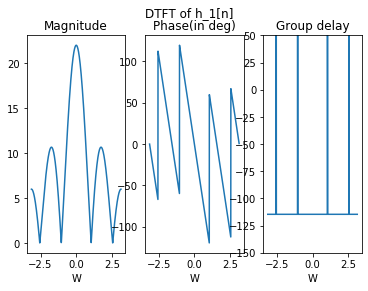

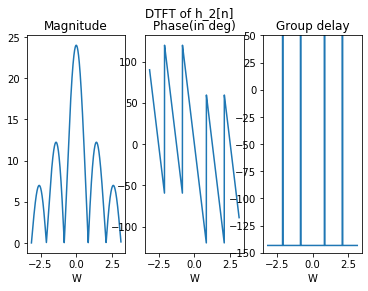

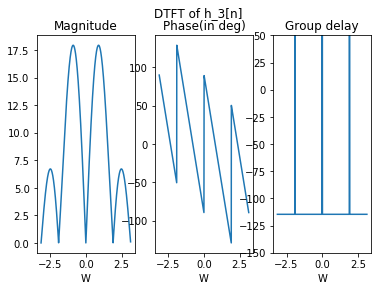

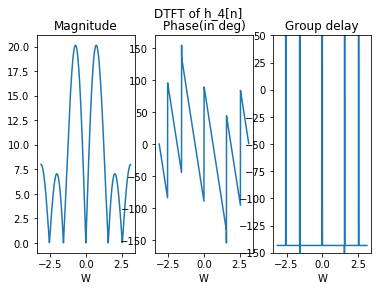

From the graphs, we can see that all of these have constant group delay and are hence GLP systems. Here, we do not consider the points of discontinuities.


In [37]:
H_1 = DTFT(h_1,len(h_1),0,N,W)
H_1_mag = [0 for i in range(N)]
for i in range(N):
    H_1_mag[i] = np.abs(H_1[i])
H_1_ph = [0 for i in range(N)]
for i in range(N):
    H_1_ph[i] = np.angle(H_1[i], deg=True)
H_1_grd = grd(H_1_ph)

#Since we don't consider the discontinuities for the group delay, I clipped off the sudden peaks
plt.subplot(1,3,1)
plt.plot(W,H_1_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W,H_1_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W,H_1_grd)
plt.gca().set_ylim([-150,50])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h_1[n]")
plt.show()

H_2 = DTFT(h_2,len(h_2),0,N,W)
H_2_mag = [0 for i in range(N)]
for i in range(N):
    H_2_mag[i] = np.abs(H_2[i])
H_2_ph = [0 for i in range(N)]
for i in range(N):
    H_2_ph[i] = np.angle(H_2[i], deg=True)
H_2_grd = grd(H_2_ph)

#Since we don't consider the discontinuities for the group delay, I clipped off the sudden peaks
plt.subplot(1,3,1)
plt.plot(W,H_2_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W,H_2_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W,H_2_grd)
plt.gca().set_ylim([-150,50])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h_2[n]")
plt.show()

H_3 = DTFT(h_3,len(h_3),0,N,W)
H_3_mag = [0 for i in range(N)]
for i in range(N):
    H_3_mag[i] = np.abs(H_3[i])
H_3_ph = [0 for i in range(N)]
for i in range(N):
    H_3_ph[i] = np.angle(H_3[i], deg=True)
H_3_grd = grd(H_3_ph)

#Since we don't consider the discontinuities for the group delay, I clipped off the sudden peaks
plt.subplot(1,3,1)
plt.plot(W,H_3_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W,H_3_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W,H_3_grd)
plt.gca().set_ylim([-150,50])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h_3[n]")
plt.show()

H_4 = DTFT(h_4,len(h_4),0,N,W)
H_4_mag = [0 for i in range(N)]
for i in range(N):
    H_4_mag[i] = np.abs(H_4[i])
H_4_ph = [0 for i in range(N)]
for i in range(N):
    H_4_ph[i] = np.angle(H_4[i], deg=True)
H_4_grd = grd(H_4_ph)

#Since we don't consider the discontinuities for the group delay, I clipped off the sudden peaks
plt.subplot(1,3,1)
plt.plot(W,H_4_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W,H_4_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W,H_4_grd)
plt.gca().set_ylim([-150,50])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h_4[n]")
plt.show()

print("From the graphs, we can see that all of these have constant group delay and are hence GLP systems. Here, we do not consider the points of discontinuities.")

# Question 2(d)

In [36]:
print("We can compare the graphs of H_1, H_3 and H_2, H_4 from the above question. We can see that the phases of H_1,H_3 and H_2,H_4 differ by 90deg. Also the magnitude of one is the maximum when that of the other is the minimum and vice versa. These can be seen from the derivations done in question 1.")

We can compare the graphs of H_1, H_3 and H_2, H_4 from the above question. We can see that the phases of H_1,H_3 and H_2,H_4 differ by 90deg. Also the magnitude of one is the maximum when that of the other is the minimum and vice versa. These can be seen from the derivations done in question 1.
